## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a = -1
b = 2
y = a*x + b
y


array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

Text(0, 0.5, 'Y')

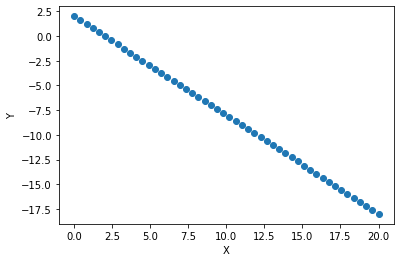

In [4]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

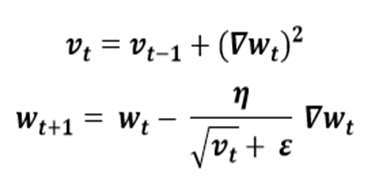

In [5]:
def adaGradAlgorthim(x, y, lr = 0.1, epsilon =1e-8  , max_iterations=100):
    th_0 = 0
    th_1 = 0
    hypo = []
    loss = []
    all_theta0 = []
    all_theta1 = []
    v_0 = 0
    v_1 = 0
    for i in range(max_iterations):
        
        all_theta0.append(th_0)
        all_theta1.append(th_1)
        
        h_theta = th_0 + th_1*x
        hypo.append(h_theta)
        cost = ((h_theta - y)**2).sum()/(2*len(y))
        loss.append(cost)
        
        d_theta0 = (h_theta - y).sum()/len(y)
        d_theta1 = (np.transpose((h_theta - y )) @ x)/len(y)
        
        v_0 = v_0 + (d_theta0)**2
        v_1 = v_1 + (d_theta1)**2
        
        th_0 = th_0 - (lr/np.sqrt(v_0) + epsilon)*d_theta0
        th_1 = th_1 - (lr/np.sqrt(v_1) + epsilon)*d_theta1
        
        if i > 0:
            if abs(loss[i-1] - loss[i] < 0.0001):
                break
            
            if abs(np.linalg.norm([all_theta0[i], all_theta1[i]])-np.linalg.norm([all_theta0[i-1],all_theta1[i-1]]))< 0.0001:
                break
            
        
        
    opt_theta_0 = th_0
    opt_theta_1 = th_1
    
    
    return all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1,i
    
        

In [6]:
all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1, i= adaGradAlgorthim(x, y)


In [7]:
y_predict = opt_theta_0 + opt_theta_1*x

In [8]:
from sklearn.metrics import r2_score
score = r2_score(y,y_predict)

In [9]:
score

0.9449738109349002

Text(0, 0.5, 'Y-Predicted')

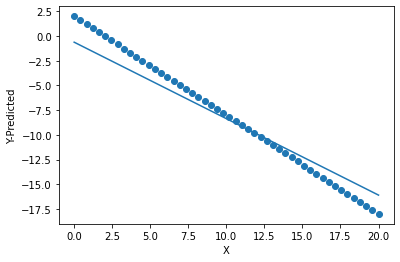

In [10]:
plt.scatter(x,y)
plt.plot(x,y_predict)
plt.xlabel("X")
plt.ylabel("Y-Predicted")

Text(0, 0.5, 'Loss')

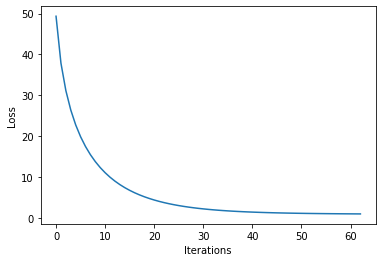

In [11]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

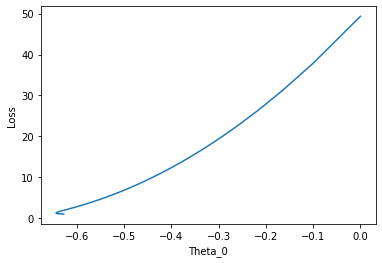

In [12]:
plt.plot(all_theta0,loss)
plt.xlabel("Theta_0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

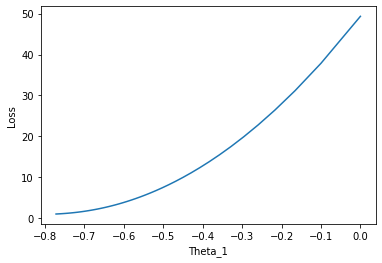

In [13]:
plt.plot(all_theta1,loss)
plt.xlabel("Theta_1")
plt.ylabel("Loss")

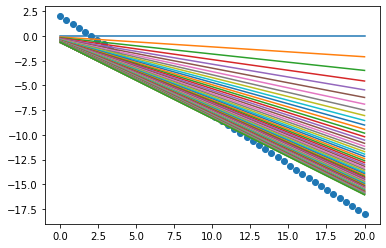

In [14]:
plt.scatter(x,y)
for i in hypo:
    plt.plot(x,i)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

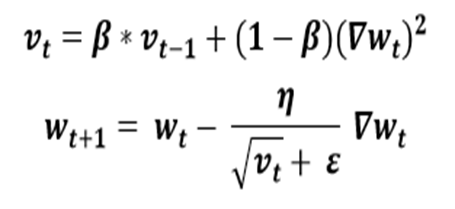

In [15]:
def RMSPropAlgorthim(x, y, lr = 0.1, epsilon =1e-8  , beta = 0.9 ,max_iterations=100):
    th_0 = 0
    th_1 = 0
    hypo = []
    loss = []
    all_theta0 = []
    all_theta1 = []
    v_0 = 0
    v_1 = 0
    for i in range(max_iterations):
        
        all_theta0.append(th_0)
        all_theta1.append(th_1)
        
        h_theta = th_0 + th_1*x
        hypo.append(h_theta)
        cost = ((h_theta - y)**2).sum()/(2*len(y))
        loss.append(cost)
        
        d_theta0 = (h_theta - y).sum()/len(y)
        d_theta1 = (np.transpose((h_theta - y )) @ x)/len(y)
        
        v_0 = (beta * v_0) + (1- beta)*(d_theta0)**2
        v_1 = (beta * v_1) + (1-beta)*(d_theta1)**2
        
        th_0 = th_0 - (lr/np.sqrt(v_0) + epsilon)*d_theta0
        th_1 = th_1 - (lr/np.sqrt(v_1) + epsilon)*d_theta1
        
        if i > 0:
            if abs(loss[i-1] - loss[i] < 0.0001):
                break
            
            if abs(np.linalg.norm([all_theta0[i], all_theta1[i]])-np.linalg.norm([all_theta0[i-1],all_theta1[i-1]]))< 0.0001:
                break
            
        
        
    opt_theta_0 = th_0
    opt_theta_1 = th_1
    
    
    return all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1,i
    
        

In [16]:
all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1, i= RMSPropAlgorthim(x, y)

In [17]:
y_predict = opt_theta_0 + opt_theta_1*x

In [18]:
from sklearn.metrics import r2_score
score = r2_score(y,y_predict)

In [19]:
score

0.9935682974238814

Text(0, 0.5, 'Y-Predicted')

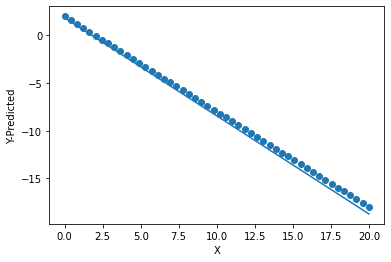

In [20]:
plt.scatter(x,y)
plt.plot(x,y_predict)
plt.xlabel("X")
plt.ylabel("Y-Predicted")

Text(0, 0.5, 'Loss')

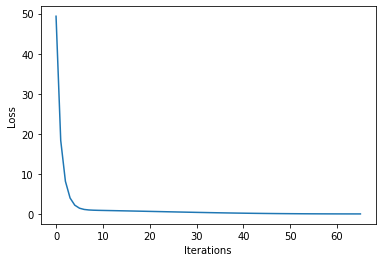

In [21]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'Loss')

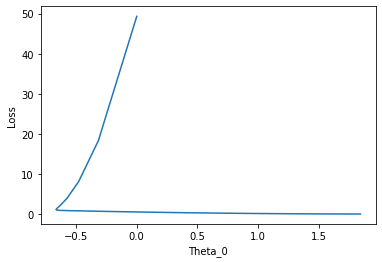

In [22]:
plt.plot(all_theta0,loss)
plt.xlabel("Theta_0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

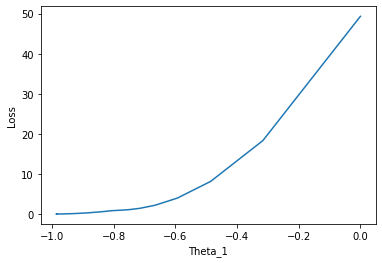

In [23]:
plt.plot(all_theta1,loss)
plt.xlabel("Theta_1")
plt.ylabel("Loss")

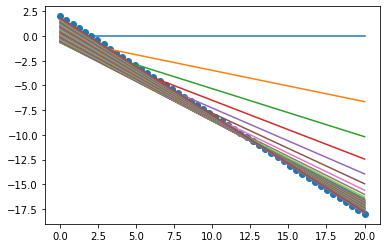

In [24]:
plt.scatter(x,y)
for i in hypo:
    plt.plot(x,i)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

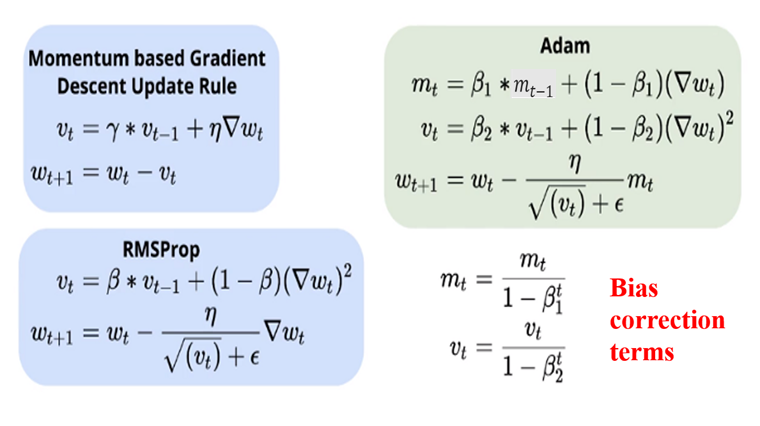

In [25]:
def AdamAlgorthim(x, y, r = 0.01, epsilon =1e-8, beta1 = 0.9,beta2 = 0.9 , max_iterations=1000):
    theta_0 = 0
    theta_1 = 0
    hypo = []
    loss = []
    all_theta0 = []
    all_theta1 = []
    v_theta_0 = 0
    v_theta_1 = 0
    m_theta_0 = 0
    m_theta_1 = 0
    
    for i in range(max_iterations):
        
       
        
        h_theta = theta_0 + theta_1*x
        hypo.append(h_theta)
        cost = ((h_theta - y)**2).sum()/(2*len(y))
        loss.append(cost)
        
        gradiant_theta_0 = (h_theta - y).sum()/len(y)
        gradiant_theta_1 = (np.transpose((h_theta - y )) @ x)/len(y)
        
       #current m
        m_theta_0 = (beta1 * m_theta_0) + (1 - beta1)*(gradiant_theta_0)
        m_theta_1 = (beta1 * m_theta_1) + (1 - beta1)*(gradiant_theta_1)
    
        
        #current v
        v_theta_0 = (beta2 * v_theta_0) + (1-beta2)*(gradiant_theta_0)**2
        v_theta_1 = (beta2 * v_theta_1) + (1-beta2)*(gradiant_theta_1)**2
        
        #bais correction
        m_hat_0 = m_theta_0/(1-(beta1**(i+1)))
        m_hat_1 = m_theta_1/(1-(beta1**(i+1)))

        v_hat_0 = v_theta_0/(1-(beta2**(i+1)))
        v_hat_1 = v_theta_1/(1-(beta2**(i+1)))
        
        #update thetas
        theta_0 = theta_0 - (r/(np.sqrt(v_hat_0)+epsilon))* m_hat_0
        theta_1 = theta_1 - (r/(np.sqrt(v_hat_1)+epsilon))* m_hat_1
        
        all_theta0.append(theta_0)
        all_theta1.append(theta_1)


        
        if i > 0:
            if abs(loss[i] - loss[i-1]) < 0.0001:
                break
            
            
        
        
    opt_theta_0 = theta_0
    opt_theta_1 = theta_1
    
    
    return all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1,i
    

In [26]:
all_theta0 , all_theta1, loss, hypo, opt_theta_0, opt_theta_1, i= AdamAlgorthim(x, y)

In [27]:
i

370

In [28]:
y_predict = opt_theta_0 + opt_theta_1*x

In [29]:
from sklearn.metrics import r2_score
scoree = r2_score(y,y_predict)

In [30]:
scoree

0.9999918799173635

Text(0, 0.5, 'Y-Predicted')

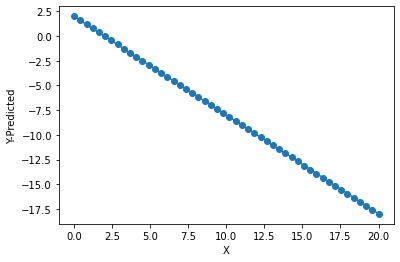

In [31]:
plt.scatter(x,y)
plt.plot(x,y_predict)
plt.xlabel("X")
plt.ylabel("Y-Predicted")

Text(0, 0.5, 'Loss')

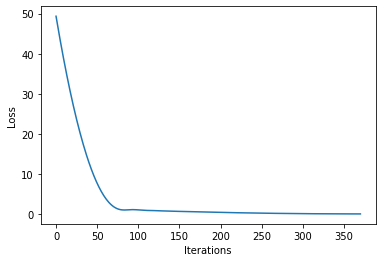

In [32]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

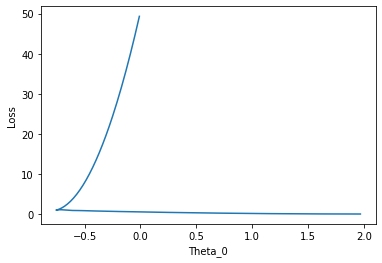

In [33]:
plt.plot(all_theta0,loss)
plt.xlabel("Theta_0")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

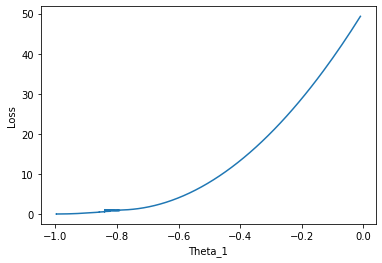

In [34]:
plt.plot(all_theta1,loss)
plt.xlabel("Theta_1")
plt.ylabel("Loss")

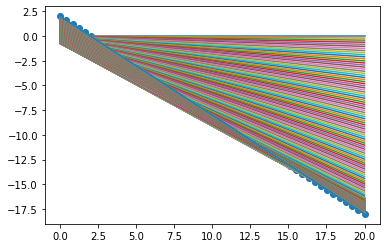

In [35]:
plt.scatter(x,y)
for i in hypo:
    plt.plot(x,i)

## Congratulations 
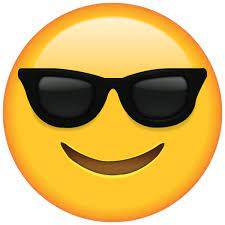